# Mean Shift Clustering

### Import Libraries

In [1]:
import math, matplotlib.pyplot as plt, operator, torch
from functools import partial
from torch.distributions.multivariate_normal import MultivariateNormal
from torch import tensor

torch.manual_seed(42)
torch.set_printoptions(precision=3, linewidth=140, sci_mode=False)

To generate our data, we are going to pick 6 random points, which we’ll call centroids and for each point, 
we are going to generate 250 random points about it.

In [3]:
# Define number of clusters and samples per cluster
n_clusters = 6
n_samples = 250

# Generate centroids (each has x and y coordinates)
centroids = torch.rand(n_clusters, 2) * 70 - 35

# Sample function to get data points around each centroid
def sample(m):
    return MultivariateNormal(m, torch.diag(tensor([5., 5.]))).sample((n_samples,))

# Generate data around each centroid and concatenate
slices = [sample(c) for c in centroids]
data = torch.cat(slices)

print(data.shape)  # Should print: torch.Size([1500, 2])

torch.Size([1500, 2])


to plot we’ll be using the following function



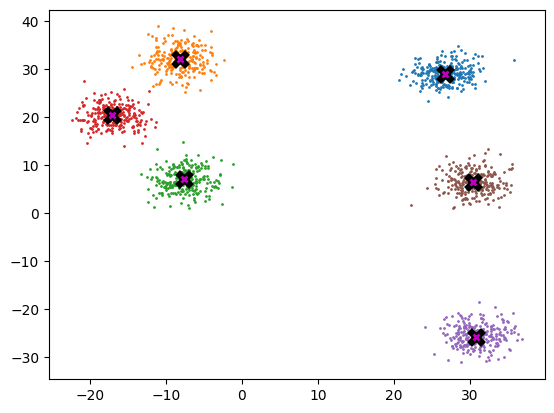

In [4]:
def plot_data(centroids, data, n_samples, ax=None):
    if ax is None: _,ax = plt.subplots()
    for i, centroid in enumerate(centroids):
        samples = data[i*n_samples:(i+1)*n_samples]
        ax.scatter(samples[:,0], samples[:,1], s=1)
        ax.plot(*centroid, markersize=10, marker="x", color='k', mew=5)
        ax.plot(*centroid, markersize=5, marker="x", color='m', mew=2)
plot_data(centroids, data, n_samples)


### Implement mean shift

In [5]:
midp = data.mean(0)
midp

tensor([ 9.222, 11.604])

our initial mean would be at the centre

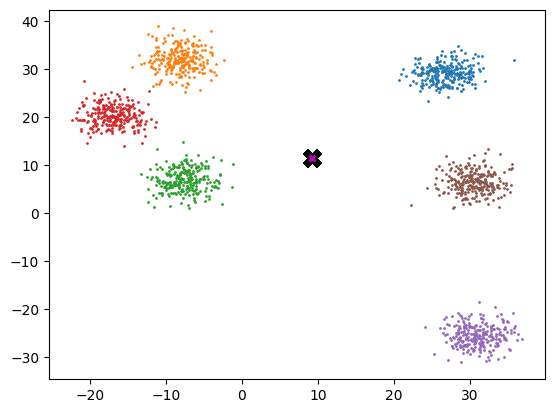

In [6]:
plot_data([midp]*6, data, n_samples)


For weighing, we’d be using a typical Gaussian Kernel with a
bandwidth of 2.5

In [7]:
def gaussian(d, bw): 
  return torch.exp(-0.5*((d/bw))**2) / (bw*math.sqrt(2*math.pi))


and mean-shift algo goes like this,



In [9]:
def one_update(X):
  for i, x in enumerate(X):
    dist = torch.sqrt(((x-X)**2).sum(1)) # calculting distance
    # computing weightage
    weight = gaussian(dist, 2.5)
    X[i] = (weight[:,None]*X).sum(0)/weight.sum()

def meanshift(data):
  X = data.clone()
  for it in range(5): one_update(X)
  return X

### Conclusion

The Mean Shift Clustering analysis successfully demonstrated an unsupervised clustering approach without prior knowledge of the number of clusters. Starting with synthetic data generated around 6 random centroids, each with 250 samples, we simulated a typical clustering problem with clear but unlabeled groupings in a 2D feature space.

Using a **Gaussian kernel with a bandwidth of 2.5**, the Mean Shift algorithm iteratively updated each data point toward the weighted average of its neighbors. This process effectively allowed the points to converge toward local high-density regions, which correspond to natural cluster centers.

Visualizations before and after applying Mean Shift show that the data points moved toward dense regions of the data distribution, demonstrating successful clustering. The method does not explicitly require the number of clusters to be predefined, making it a flexible and adaptive solution for clustering tasks where prior knowledge is limited or unreliable.

This example highlights the key advantages of Mean Shift:

* It automatically identifies the number of clusters.
* It is capable of discovering arbitrarily shaped clusters.
* The results are intuitive and align well with the expected data distribution.

However, it is important to note that the choice of bandwidth significantly affects the clustering outcome: a too-small bandwidth may over-segment the data, while too large a bandwidth may merge distinct clusters.

In summary, Mean Shift is a powerful non-parametric algorithm for clustering that excels in exploratory data analysis when the cluster structure is unknown, supporting data segmentation and density estimation tasks in various domains such as image processing, computer vision, and pattern recognition.
